# IT20090944- Linear Regression (using boston housing price)

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#setting the dataset file path

file_path = r"C:\Users\oshanu\Downloads\hou_all.csv"
df = pd.read_csv(file_path)

In [3]:
# Exploring the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


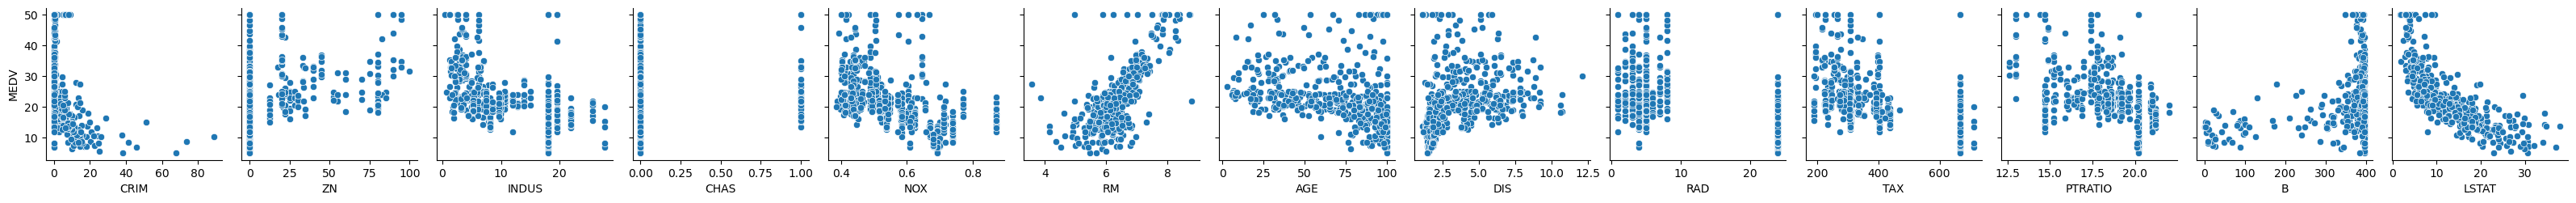

In [4]:
# Visualizing the dataset
sns.pairplot(df, x_vars=df.columns[:-1], y_vars=['MEDV'])

In [5]:
#Describe the dataset with important information
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#get the information about the number of rows and columns in the dataset
df.shape

(506, 14)

In [7]:
#information about data types of columns in dataset
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
#check the null value columns
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
target_feature = 'MEDV'

#separe  target from other features

y= df[target_feature]


#separate features from target

x=df.drop(target_feature, axis=1)

In [10]:
#view x (columns as x)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
#view y (target variable)
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [12]:
#split dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state=7)

In [13]:
#import linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [14]:
#train score
training_score = round(regression.score(x_train,y_train)*100,2)
print('Train score of linear regression:',training_score )

Train score of linear regression: 76.99


In [15]:
#define y predict value
y_predict = regression.predict(x_test)

In [16]:
#find r_2 score value
from sklearn.metrics import r2_score
score = round(r2_score(y_test,y_predict)*100,2)
print('r_2 score is ',score)

r_2 score is  57.85


In [17]:
#calculate Mean Absolute  Error,Squared error,Mean Squared error
from sklearn import metrics
print("Mean Absolute  Error on test data of linear regression is :",metrics.mean_absolute_error(y_test,y_predict))
print("Mean Squared error on test data of linear regression :", metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared error on test data of linear regression :',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute  Error on test data of linear regression is : 3.7807629091749453
Mean Squared error on test data of linear regression : 34.05648134887446
Root Mean Squared error on test data of linear regression : 5.835793120808384


In [18]:
#check actual, predicted values and the variance
df1 = pd.DataFrame({'Actual' :y_test, 'Predicted':y_predict, 'Variance':y_test-y_predict})
df1.head()

,Actual,Predicted,Variance
357,21.7,23.016076,-1.316076
337,18.5,19.175452,-0.675452
327,22.2,19.931333,2.268667
13,20.4,19.192223,1.207777
418,8.8,4.733661,4.066339


In [19]:
#view dataset
df.head(14)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [20]:
#predic the value of 13 th row using regression.predict
regression.predict([[0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26]])

C:\Users\oshanu\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.19222285])

In [21]:
#calculate the intercept
regression.intercept_

23.55424546759183

In [22]:
#calculate the coefficient
regression.coef_

array([-1.24649091e-01,  3.04735052e-02,  2.17990089e-02,  2.79225761e+00,
       -1.52135247e+01,  5.27249266e+00, -1.10577742e-02, -1.27320872e+00,
        2.65804711e-01, -1.15043029e-02, -9.19571148e-01,  1.01624292e-02,
       -3.89712044e-01])

In [23]:
#get linear coefficient of columns
lr_coefficient = pd.DataFrame()
lr_coefficient["Columns"] = x_train.columns
lr_coefficient["coefficient Estimate"] = pd.Series(regression.coef_)
print(lr_coefficient)

    Columns  coefficient Estimate
0      CRIM             -0.124649
1        ZN              0.030474
2     INDUS              0.021799
3      CHAS              2.792258
4       NOX            -15.213525
5        RM              5.272493
6       AGE             -0.011058
7       DIS             -1.273209
8       RAD              0.265805
9       TAX             -0.011504
10  PTRATIO             -0.919571
11        B              0.010162
12    LSTAT             -0.389712


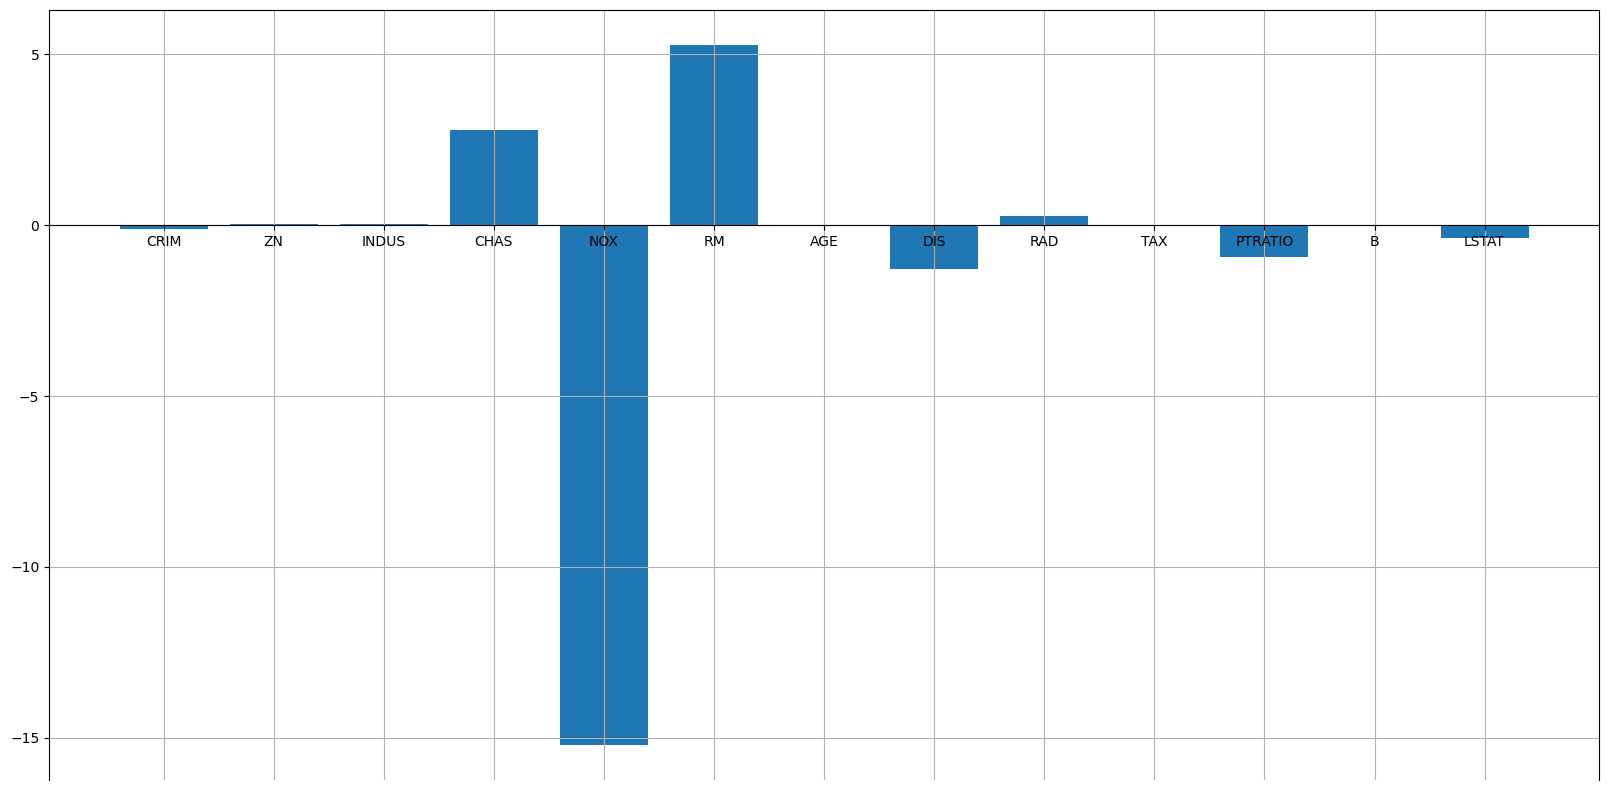

In [24]:
#plot the coefficient score
fig, ax = plt.subplots(figsize =(20,10))

ax.bar(lr_coefficient["Columns"],
lr_coefficient['coefficient Estimate'])

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.grid()
plt.show()

In [25]:
#saving the model to local file
import pickle
filename = 'linear_model.pkl'
pickle.dump(regression, open(filename, 'wb'))

In [26]:
#predict the value using saved model
loaded_model = pickle.load(open(filename, 'rb'))
predicted_value =loaded_model.predict([[0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26]])
print("predicted value is :\n", predicted_value)

predicted value is :
 [19.19222285]


C:\Users\oshanu\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
#check again first 4 rows with actual,predicted values and with variance 
df1 = pd.DataFrame({'Actual' :y_test, 'Predicted':y_predict, 'Variance':y_test-y_predict})
df1.head()

,Actual,Predicted,Variance
357,21.7,23.016076,-1.316076
337,18.5,19.175452,-0.675452
327,22.2,19.931333,2.268667
13,20.4,19.192223,1.207777
418,8.8,4.733661,4.066339


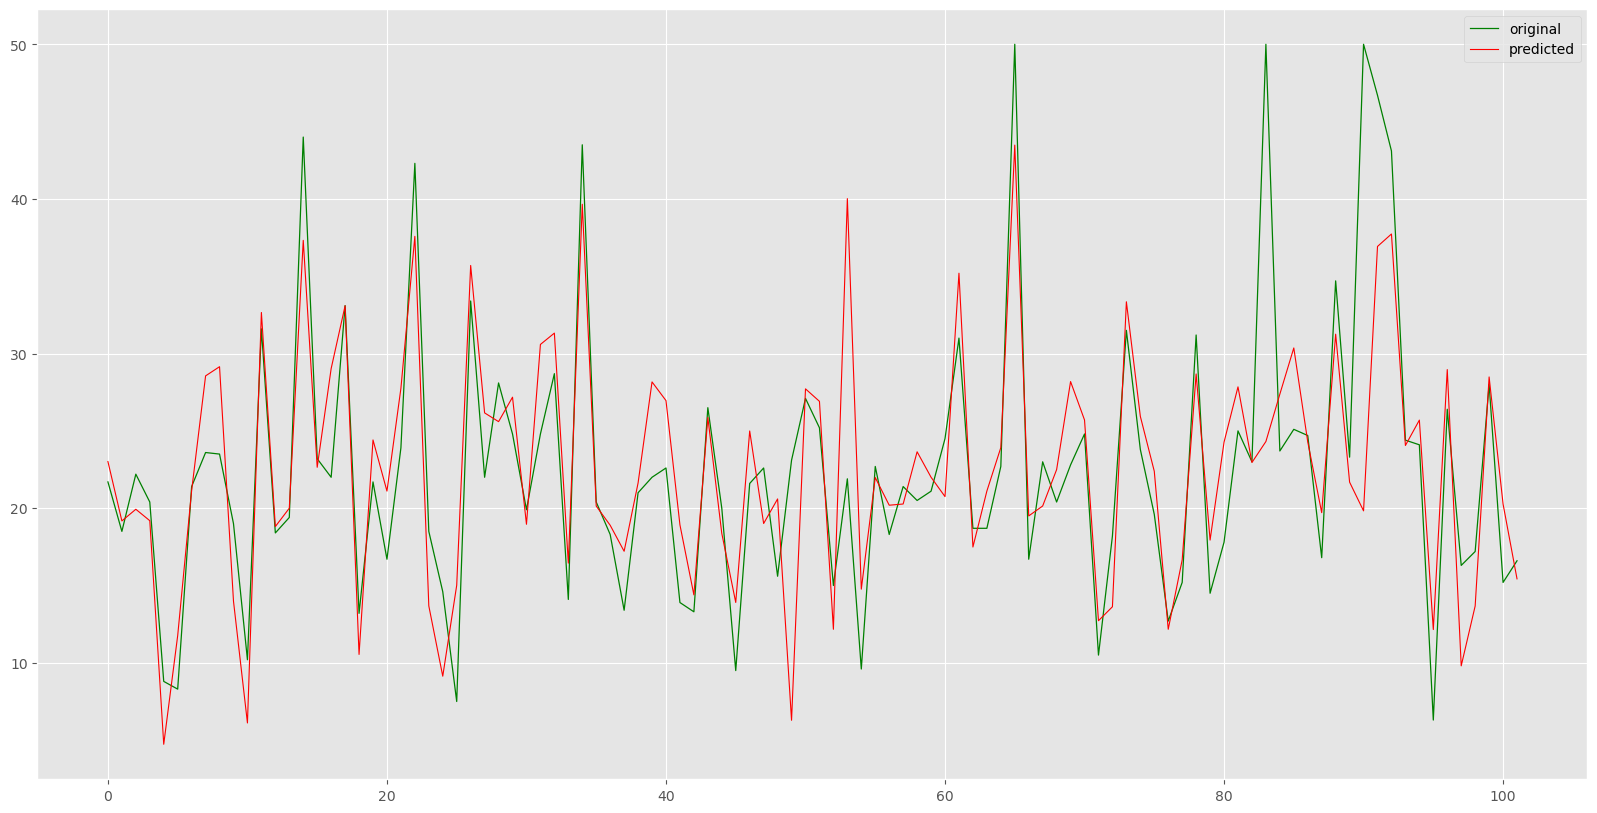

In [28]:
#plot the graph which clearly shows the actual and predicted values and difference between them
fig, ax = plt.subplots(figsize = (20,10))
x_axis =range(len(x_test))
plt.plot(x_axis, y_test, lw=0.9, color='green', label='original' )
plt.plot(x_axis, y_predict, lw=0.8, color='red',   label='predicted' )
plt.legend()
plt.show()